In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
#df = pd.read_csv(".\\Data_USD.csv", header=None,skiprows=1)
df = pd.read_csv(".\\Data_USD.csv")
df.head().to_csv(".\\test.csv")

In [3]:
T=df.groupby("SEX") 

In [4]:
T.describe()

LIMIT_BAL_US                                                     \
           count         mean          std         min          25%   
SEX                                                                   
1        11888.0  5933.433651  4943.946037  362.857143  1814.285714   
2        18112.0  6171.708764  4544.124514  362.857143  2540.000000   

                                           EDUCATION            ...  \
             50%          75%          max     count      mean  ...   
SEX                                                             ...   
1    4717.142857  8708.571429  29028.57143   11888.0  1.839250  ...   
2    5442.857143  8708.571429  36285.71429   18112.0  1.862246  ...   

    CREDIT_UTILIZATION         DEFAULT_PAYMENT_NEXT_MO                      \
                   75%     max                   count      mean       std   
SEX                                                                          
1             0.867975  4.1406                 11888.0  0.241672  0.428115   
2             0.792862  6.4553                 18112.0  0.207763  0.405717   

                              
     min  25%  50%  75%  max  
SEX                           
1    0.0  0.0  0.0  0.0  1.0  
2    0.0  0.0  0.0  0.0  1.0  

[2 rows x 80 columns]

In [5]:
df.tail()

,LIMIT_BAL_US,SEX,EDUCATION,MARRIAGE,AGE,PAY_SCORE_AVG,BILL_AVG_US,PAY_AMT_AVG_US,PAY_TO_BILL,CREDIT_UTILIZATION,DEFAULT_PAYMENT_NEXT_MO
29995,7982.857143,1,3,1,39,0.00,4386.634429,257.326190,0.06,0.858855,0
29996,5442.857143,1,3,2,43,-0.67,128.100667,87.630000,0.68,0.011220,0
29997,1088.571429,1,2,2,37,1.33,426.332952,189.290476,0.44,0.118833,1
29998,2902.857143,1,3,1,41,-0.17,1612.361762,890.094619,0.55,-0.020563,1
29999,1814.285714,1,2,1,46,0.00,1396.238000,50.243619,0.04,0.958580,1


In [6]:
# X = df.drop('Y_Value',axis =1).values
# y = df['Y_Value'].values
X = df.drop('DEFAULT_PAYMENT_NEXT_MO',axis =1).values
X[2999,0]

1814.285714

In [7]:
X.shape

(30000, 10)

In [8]:
y = df['DEFAULT_PAYMENT_NEXT_MO'].values
#y.reshape(-1,1)

In [9]:
#print(X.shape)
X.shape

(30000, 10)

In [10]:
#print(y.shape)
y.shape

(30000,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=7)

In [12]:
y_test.T

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [13]:
X_test.shape

(7500, 10)

In [14]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [15]:
X_scaler

StandardScaler()

In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
X_train_scaled

array([[-0.29687854, -1.23146134,  0.19049704, ...,  1.39995787,
        -0.03719648,  1.24165503],
       [-0.68067526, -1.23146134, -1.07797983, ..., -0.41624653,
         0.05086549, -0.96366403],
       [ 0.6242336 , -1.23146134,  0.19049704, ...,  0.10712354,
        -0.0683851 ,  0.62648317],
       ...,
       [ 0.24043688, -1.23146134,  0.19049704, ...,  0.1370144 ,
        -0.0683851 ,  1.04491376],
       [ 0.24043688,  0.81204336,  0.19049704, ..., -0.21946759,
         0.10773885, -0.99149384],
       [-0.91095329,  0.81204336,  1.4589739 , ..., -0.39131674,
        -0.0683851 ,  1.16802625]])

In [18]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [19]:
from keras.models import Sequential

#instantiate
model = Sequential()

In [20]:
from keras.layers import Dense

number_inputs = 50
number_hidden = 60

model.add(Dense(units = number_hidden, activation ='relu', input_dim=number_inputs))
model.add(Dense(units = 50, activation ='relu')) #second hidden layer
model.add(Dense(units = 40, activation ='relu')) #second hidden layer
model.add(Dense(units = 30, activation ='relu')) #second hidden layer
model.add(Dense(units = 15, activation ='relu')) #second hidden layer
model.add(Dense(units = 5, activation ='relu')) #third hidden layer

In [21]:
number_classes =2 ## yes or no
model.add(Dense(units = number_classes, activation = 'sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 35)                1085      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                900       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

In [23]:
#compile the model
model.compile(optimizer = 'sgd' ,
             loss = 'categorical_crossentropy',
             metrics =['accuracy'])

In [24]:
#train the model

model.fit(X_train_scaled, y_train_categorical, epochs=100,shuffle = True,verbose =2)

Epoch 1/100
 - 2s - loss: 0.6029 - accuracy: 0.7575
Epoch 2/100
 - 2s - loss: 0.5301 - accuracy: 0.7784
Epoch 3/100
 - 2s - loss: 0.5136 - accuracy: 0.7784
Epoch 4/100
 - 2s - loss: 0.5018 - accuracy: 0.7784
Epoch 5/100
 - 2s - loss: 0.4927 - accuracy: 0.7784
Epoch 6/100
 - 2s - loss: 0.4847 - accuracy: 0.7784
Epoch 7/100
 - 2s - loss: 0.4784 - accuracy: 0.7784
Epoch 8/100
 - 2s - loss: 0.4731 - accuracy: 0.7784
Epoch 9/100
 - 2s - loss: 0.4687 - accuracy: 0.7784
Epoch 10/100
 - 2s - loss: 0.4645 - accuracy: 0.7784
Epoch 11/100
 - 2s - loss: 0.4613 - accuracy: 0.7784
Epoch 12/100
 - 2s - loss: 0.4587 - accuracy: 0.7785
Epoch 13/100
 - 2s - loss: 0.4563 - accuracy: 0.7902
Epoch 14/100
 - 2s - loss: 0.4547 - accuracy: 0.8074
Epoch 15/100
 - 2s - loss: 0.4530 - accuracy: 0.8072
Epoch 16/100
 - 2s - loss: 0.4515 - accuracy: 0.8065
Epoch 17/100
 - 2s - loss: 0.4504 - accuracy: 0.8068
Epoch 18/100
 - 2s - loss: 0.4496 - accuracy: 0.8064
Epoch 19/100
 - 2s - loss: 0.4488 - accuracy: 0.8070
Ep

In [25]:
model.save("ccneuralnetwork.h5")

In [26]:
#quantify the model
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test_categorical,verbose =2)
print( model_loss )
print (model_accuracy)

0.4630561396757762
0.802133321762085


F1, Precision Recall, and Confusion Matrix

In [27]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [28]:
y_prediction = model.predict_classes(X_test)

In [29]:
y_prediction.reshape(-1,1)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [30]:
print("Recall score:"+ str(recall_score(y_test, y_prediction)))

Recall score:0.9951544518473653


In [31]:
print(classification_report(y_test, y_prediction,
                            target_names=["default", "non_default"]))

              precision    recall  f1-score   support

     default       0.81      0.01      0.01      5849
 non_default       0.22      1.00      0.36      1651

    accuracy                           0.22      7500
   macro avg       0.52      0.50      0.19      7500
weighted avg       0.68      0.22      0.09      7500



In [32]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[  35 5814]
 [   8 1643]]
Normalized confusion matrix
[[0.01 0.99]
 [0.   1.  ]]


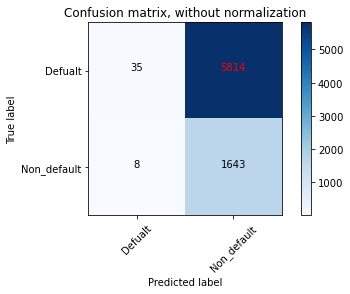

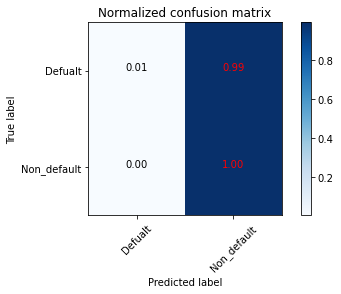

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Defualt', 'Non_default'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Defualt', 'Non_default'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()